In [1]:
# upload local file in colab
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
# import libraries
import io
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# import into dataframe
dataframe = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [4]:
df = dataframe.copy()
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [5]:
# renaming column name
df = df.rename(columns={'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': 'Cumulative'})

In [6]:
df.shape

(61900, 12)

In [7]:
# check duplicate data
df.duplicated().sum()

0

In [8]:
# statistic values for this data 
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  61900 non-null  object 
 1   day                      61900 non-null  int64  
 2   month                    61900 non-null  int64  
 3   year                     61900 non-null  int64  
 4   cases                    61900 non-null  int64  
 5   deaths                   61900 non-null  int64  
 6   countriesAndTerritories  61900 non-null  object 
 7   geoId                    61625 non-null  object 
 8   countryterritoryCode     61777 non-null  object 
 9   popData2019              61777 non-null  float64
 10  continentExp             61900 non-null  object 
 11  Cumulative               59021 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 5.7+ MB


In [10]:
# find number of unique values in each column
df.nunique()

dateRep                      350
day                           31
month                         12
year                           2
cases                       5966
deaths                      1049
countriesAndTerritories      214
geoId                        213
countryterritoryCode         212
popData2019                  212
continentExp                   6
Cumulative                 39047
dtype: int64

In [11]:
# check the number of null values
df.isna().sum()

dateRep                       0
day                           0
month                         0
year                          0
cases                         0
deaths                        0
countriesAndTerritories       0
geoId                       275
countryterritoryCode        123
popData2019                 123
continentExp                  0
Cumulative                 2879
dtype: int64

In [12]:
# since 3 columns (geoId, countryterritoryCode, popDate2019) contain less number of null values compared to total number of dataset we have so we can drop that null value
df.dropna(subset=['geoId', 'countryterritoryCode', 'popData2019'], inplace=True)

# Cumulative_number column has pretty large number of null values so we can replace those null values with mean value
df.Cumulative.fillna(df.Cumulative.mean(), inplace=True)

In [13]:
df.dtypes

dateRep                     object
day                          int64
month                        int64
year                         int64
cases                        int64
deaths                       int64
countriesAndTerritories     object
geoId                       object
countryterritoryCode        object
popData2019                float64
continentExp                object
Cumulative                 float64
dtype: object

In [14]:
# converting object datatype into datetime datatype
df['dateRep'] = pd.to_datetime(df['dateRep'])

In [15]:
# taking date as an index
df.set_index('dateRep', inplace=True)
df.sort_index(inplace=True)

In [16]:
df.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative
dateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Ecuador,EC,ECU,17373657.0,America,66.47076
2019-12-31,31,12,2019,0,0,Czechia,CZ,CZE,10649800.0,Europe,66.47076
2019-12-31,31,12,2019,0,0,Georgia,GE,GEO,3996762.0,Europe,66.47076
2019-12-31,31,12,2019,0,0,Croatia,HR,HRV,4076246.0,Europe,66.47076
2019-12-31,31,12,2019,0,0,Germany,DE,DEU,83019213.0,Europe,66.47076


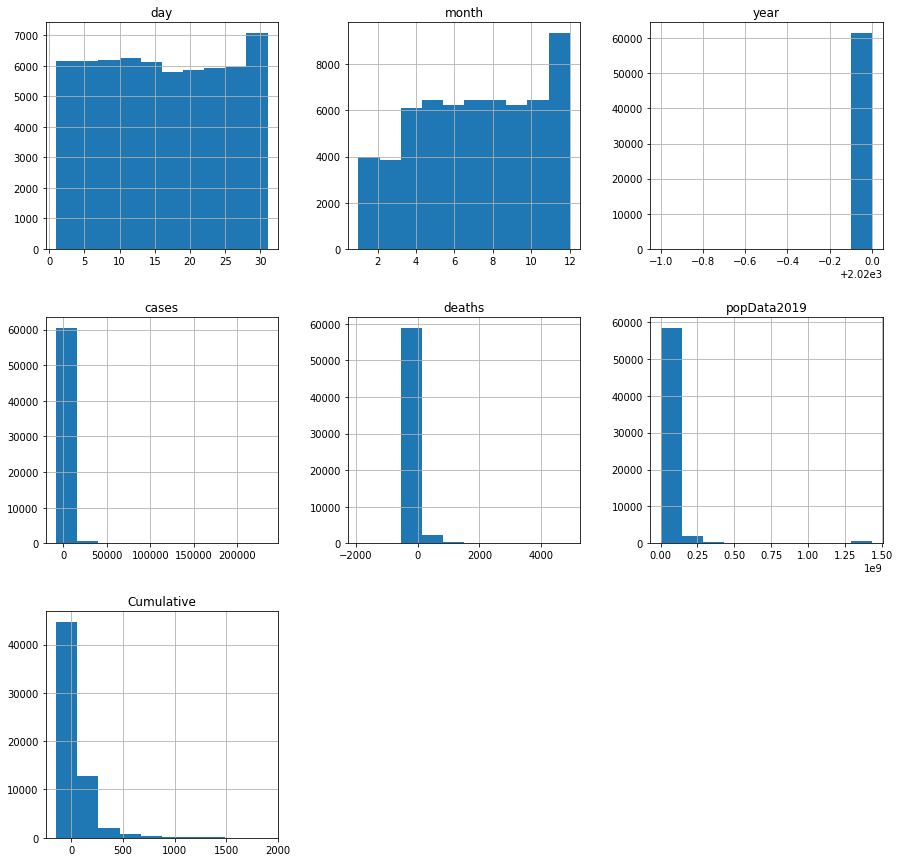

In [17]:
df.hist(figsize=(15,15));

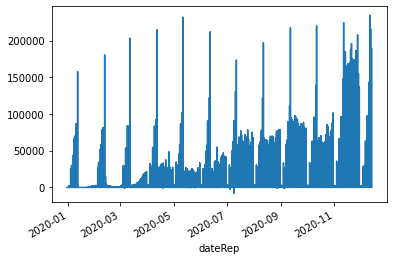

In [18]:
# COVID-19 new cases on the basis of year
df.cases.plot()

Seems that after 2020-11 there are more covid cases.

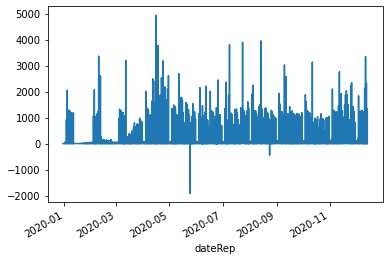

In [19]:
# People's death on the basis of year
df.deaths.plot()

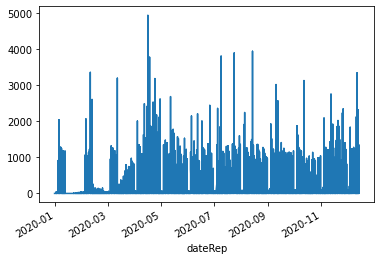

In [20]:
# from above figure we can see that there are some negative number of death cases which is impossible so let's fill that negative value with average value 
df['deaths'] = df.deaths.apply(lambda x: df.deaths.mean() if x<0 else x)
df.deaths.plot()

Around the interval of date 2020-04 to 2020-05 there is slightly more death cases 

In [21]:
df.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative
dateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0.0,Ecuador,EC,ECU,17373657.0,America,66.47076
2019-12-31,31,12,2019,0,0.0,Czechia,CZ,CZE,10649800.0,Europe,66.47076
2019-12-31,31,12,2019,0,0.0,Georgia,GE,GEO,3996762.0,Europe,66.47076
2019-12-31,31,12,2019,0,0.0,Croatia,HR,HRV,4076246.0,Europe,66.47076
2019-12-31,31,12,2019,0,0.0,Germany,DE,DEU,83019213.0,Europe,66.47076


In [22]:
# number of new covid cases and death cases in each continent
df_continent = df.groupby('continentExp').sum()[['cases','deaths']]
df_continent

,cases,deaths
continentExp,,
Africa,2363291,56174.000000
America,30887593,785420.000000
Asia,16782046,290598.221359
Europe,21400012,481944.549511
Oceania,53437,1154.000000


Text(0, 0.5, 'cases')

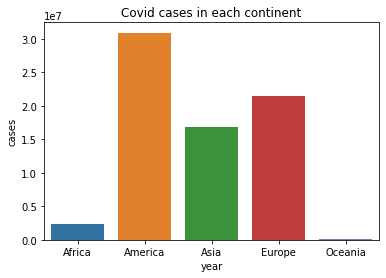

In [23]:
# New covid cases in each continent
ax = sns.barplot(x=df_continent.index, y="cases", data=df_continent)
ax.set_title('Covid cases in each continent')
ax.set_xlabel('year')
ax.set_ylabel('cases')

America has highest covid cases whereas Oceania has lowest.

Text(0, 0.5, 'deaths')

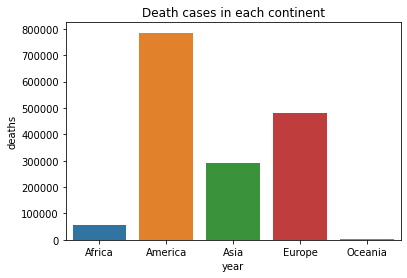

In [24]:
# Death cases in each continent
ax = sns.barplot(x=df_continent.index, y="deaths", data=df_continent)
ax.set_title('Death cases in each continent')
ax.set_xlabel('year')
ax.set_ylabel('deaths')

Here the death rate is also higher in America and lower in Oceania.

In [25]:
# Covid recovered percentage in each continent
df_recovered_percent = (df_continent.cases - df_continent.deaths) / df_continent.cases * 100 
data = {'continentExp':df_continent.index, 'recovered_percent':df_recovered_percent.values}
df_recovered_percent = pd.DataFrame(data)
df_recovered_percent

,continentExp,recovered_percent
0,Africa,97.623060
1,America,97.457167
2,Asia,98.268398
3,Europe,97.747924
4,Oceania,97.840448


Asia has slightly high covid recovered rate.

In [26]:
# cleaning the duplicate and unnecessary columns
un_cols = ['day','month','year', 'countriesAndTerritories', 'geoId']
df.drop(labels=un_cols, axis=1, inplace=True)

In [27]:
df.head()

,cases,deaths,countryterritoryCode,popData2019,continentExp,Cumulative
dateRep,,,,,,
2019-12-31,0,0.0,ECU,17373657.0,America,66.47076
2019-12-31,0,0.0,CZE,10649800.0,Europe,66.47076
2019-12-31,0,0.0,GEO,3996762.0,Europe,66.47076
2019-12-31,0,0.0,HRV,4076246.0,Europe,66.47076
2019-12-31,0,0.0,DEU,83019213.0,Europe,66.47076


In [28]:
# Correlation of these data
df.corr()

,cases,deaths,popData2019,Cumulative
cases,1.000000,0.744832,0.308257,0.224949
deaths,0.744832,1.000000,0.273511,0.178399
popData2019,0.308257,0.273511,1.000000,-0.044814
Cumulative,0.224949,0.178399,-0.044814,1.000000


From above correlation dataframe we can conclude that cases and deaths columns are positively corelated whereas popData2019 and Cumulative columns are negatively correlated. Other than that there are not much corelation between each other.  